# Visualizations

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import sys

In [2]:
sys.path.insert(0, "./portfolio")

import streamlit as st
from streamlit_gsheets import GSheetsConnection
conn = st.connection("gsheets", type=GSheetsConnection)

2024-04-28 16:40:43.012 
  command:

    streamlit run /Users/martinadossi/anaconda3/envs/streamlit_app_311/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


## Set up

In [59]:
sys.path.insert(0, "./portfolio")
with open("config.yml", 'r') as f:
    cfg = yaml.safe_load(f)

dict_emotion_id = cfg['map_emotion_id']
dict_emotion_color = cfg['map_emotion_color']

# dict_emotion_id_inv = {v: k for k, v in dict_emotion_id.items()}

dict_emotion_intensity_id = cfg['map_emotion_intensity_id']
dict_emotion_intensity_color = cfg['map_emotion_intensity_color']

In [39]:
df_emotion = conn.read(
    worksheet="pixel_year",
    ttl="10m",
    usecols=range(13),
    nrows=31
)

first_col = df_emotion.columns[0]
df_emotion = df_emotion.rename(columns={first_col: 'id_day'})
df_emotion = df_emotion.set_index('id_day')
df_emotion = df_emotion.fillna('0')

df_emotion.head(5)

2024-04-28 16:50:53.370 No runtime found, using MemoryCacheStorageManager


,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,Happy,Happy,Happy,Loved,0,0,0,0,0,0,0,0
2,Happy,Happy,Happy,Sad,0,0,0,0,0,0,0,0
3,Scared,Sad,Happy,Confident,0,0,0,0,0,0,0,0
4,Scared,Sad,Happy,Scared,0,0,0,0,0,0,0,0
5,Happy,Scared,Sad,Happy,0,0,0,0,0,0,0,0


In [40]:
df_intensity = conn.read(
    worksheet="pixel_year_intensity",
    ttl="10m",
    usecols=range(13),
    nrows=31
)

first_col = df_intensity.columns[0]
df_intensity = df_intensity.rename(columns={first_col: 'id_day'})
df_intensity = df_intensity.set_index('id_day')
df_intensity = df_intensity.fillna('0')

df_intensity.head(5)

2024-04-28 16:50:56.042 No runtime found, using MemoryCacheStorageManager


,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,:),:|,:|,:),0,0,0,0,0,0,0,0
2,:),:),:|,:|,0,0,0,0,0,0,0,0
3,:|,:|,:|,:|,0,0,0,0,0,0,0,0
4,:|,:|,:|,:|,0,0,0,0,0,0,0,0
5,:),:|,:|,:),0,0,0,0,0,0,0,0


## Heatmap

### Pixel year

In [50]:
# Replace str valeus with numerical ids
df_emotion_id = df_emotion.copy()

df_emotion_id = (
    pd.DataFrame([df_emotion_id[col].map(dict_emotion_id) for col in df_emotion_id.columns])
    .transpose()
    .fillna(0)
    .astype(int)
)

df_emotion_id.head(5)

,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,2,2,2,3,0,0,0,0,0,0,0,0
2,2,2,2,9,0,0,0,0,0,0,0,0
3,8,9,2,4,0,0,0,0,0,0,0,0
4,8,9,2,8,0,0,0,0,0,0,0,0
5,2,8,9,2,0,0,0,0,0,0,0,0


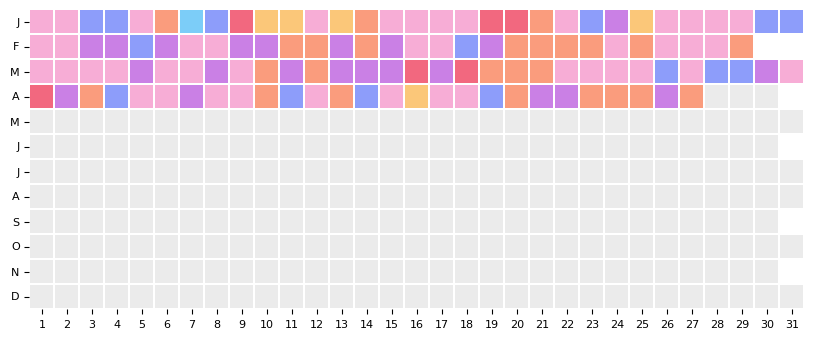

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    df_emotion_id.transpose(),
    cmap=list(dict_emotion_color.values()),
    cbar=False,
    linewidths=1.2,
    linecolor='white',
    square=True,
    vmin=0,
    vmax=len(dict_emotion_color),
    xticklabels=1,
    ax=ax
)

ax.set_yticklabels(labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], rotation=0, fontsize=8)
ax.set_xticklabels(labels=list(df_emotion_id.index), rotation=0, fontsize=8)
ax.set_xlabel('')

plt.show()

### Pixel year intensity

In [53]:
df_intensity_id = df_intensity.copy()

df_intensity_id = (
    pd.DataFrame([df_intensity_id[col].map(dict_emotion_intensity_id) for col in df_intensity_id.columns])
    .transpose()
    .fillna(0)
    .astype(int)
)

df_intensity_id.head(5)

,January,February,March,April,May,June,July,August,September,October,November,December
id_day,,,,,,,,,,,,
1,5,4,4,5,0,0,0,0,0,0,0,0
2,5,5,4,4,0,0,0,0,0,0,0,0
3,4,4,4,4,0,0,0,0,0,0,0,0
4,4,4,4,4,0,0,0,0,0,0,0,0
5,5,4,4,5,0,0,0,0,0,0,0,0


In [102]:
labels = df_intensity.transpose().replace('0', '').replace('Missing', '')

In [104]:
dict_emotion_intensity_color

{0: '#ebebeb',
 'Missing': '#ffffff',
 ':((': '#2c4b9b',
 ':(': '#5d8dca',
 ':|': '#ebebeb',
 ':)': '#ead65b',
 ':))': '#f3934b'}

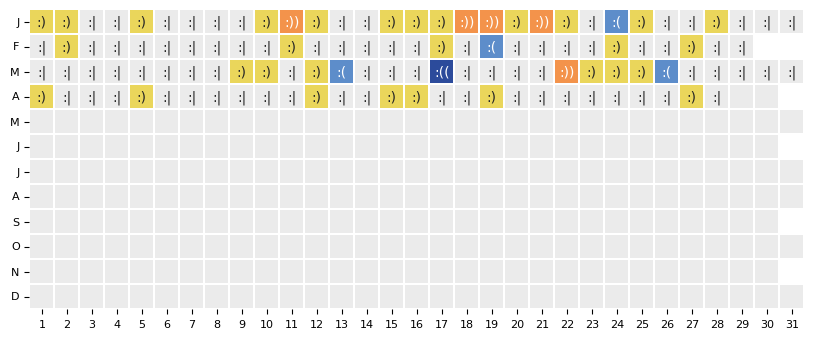

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    df_intensity_id.transpose(),
    cmap=list(dict_emotion_intensity_color.values()),
    cbar=False,
    linewidths=1.2,
    linecolor='white',
    square=True,
    vmin=0,
    #annot=df_intensity_id.transpose(),
    annot=labels,
    fmt='',
    vmax=len(dict_emotion_intensity_color),
    xticklabels=1,
    ax=ax
)

ax.set_yticklabels(labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], rotation=0, fontsize=8)
ax.set_xticklabels(labels=list(df_intensity_id.index), rotation=0, fontsize=8)
ax.set_xlabel('')

plt.show()

## Research questions
- What's the most frequent status change?

- For any state, how often I felt `insert_status`?

In [ ]:
status = 'Happy'

In [ ]:
Transizioni di stati: quali avvengono?

Analisi per singolo stato
quanto mi sono sentita *INSERT STATO*
con quante possibili intensità
per quanti giorni di fila minimo e massimo e in media
in quale mese di più, in quale di meno
correlazione con weekend

In [65]:
df_all = df_emotion.melt()
df_all = df_all[(df_all['value']!='0') & (df_all['value']!='Missing')]
df_all.columns = ['month', 'emotion']

df_all.head(5)

,month,emotion
0,January,Happy
1,January,Happy
2,January,Scared
3,January,Scared
4,January,Happy


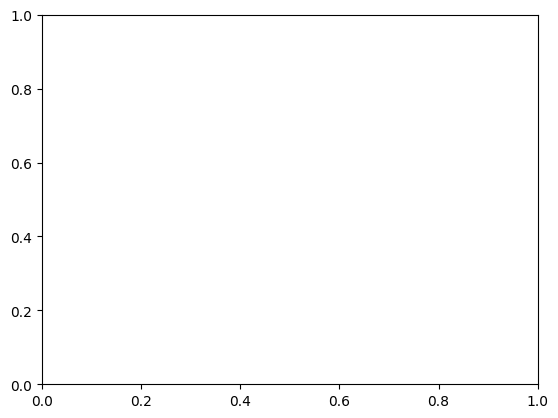

In [70]:
fig, ax = plt.subplots(1, 1)

plt.show()

In [66]:
df_all['emotion'].value_counts()

Happy        44
Confident    25
Sad          22
Scared       15
Loved         6
Playful       5
Angry         1
Name: emotion, dtype: int64

In [74]:
df_month_emotion = pd.DataFrame(df_all[['month', 'emotion']].value_counts().sort_index()).reset_index()
df_month_emotion.columns = ['month', 'emotion', 'count']

In [79]:
df_month_emotion_pivot = pd.pivot_table(df_month_emotion, values='count', index='month', columns='emotion').fillna(0)
df_month_emotion_pivot = df_month_emotion_pivot.reindex(['January', 'February', 'March', 'April'])
df_month_emotion_pivot

emotion,Angry,Confident,Happy,Loved,Playful,Sad,Scared
month,,,,,,,
January,1.0,3.0,13.0,3.0,4.0,1.0,6.0
February,0.0,9.0,10.0,0.0,0.0,8.0,2.0
March,0.0,5.0,13.0,2.0,0.0,8.0,3.0
April,0.0,8.0,8.0,1.0,1.0,5.0,4.0
